## Modules

In [ ]:
import os

In [12]:
import pandas as pd
from plotnine import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [17]:
from sklearn import preprocessing

## Dataset

In [67]:
var = pd.read_csv('D:/Python/Bootcamp/coding/Other_open_data/data_vars.csv', sep=';')
var

,CODIGO MUNICIPIO,var_nidos,var_pop
0,48001,-31,0.066
1,48002,-48,-0.101
2,48911,-8,-5.000
3,48093,8,-0.011
4,48912,-9,0.004
...,...,...,...
101,48097,-23,-0.001
102,48024,1,0.008
103,48025,-13,0.014
104,48913,-16,-0.002


In [68]:
aux = var.loc[:,['var_nidos', 'var_pop']]

In [69]:
# scale the dataset using StandardScaler
aux = var.loc[:,['var_nidos', 'var_pop']]
scaler = StandardScaler()
scaler.fit(aux)
aux = scaler.transform(aux)


## Silouhette

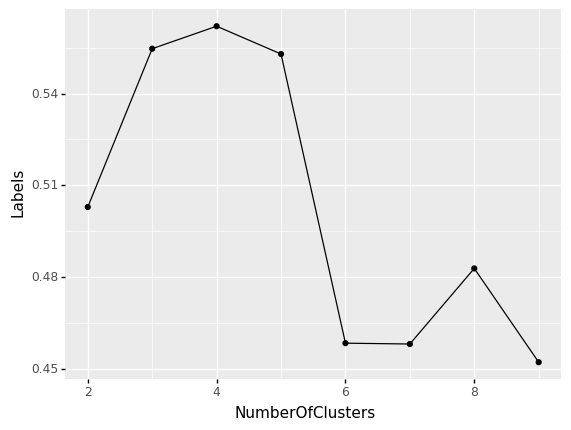

<ggplot: (-9223371900412344508)>

In [70]:
silhouettes = []

for i in range(2,10,1):
  model = KMeans(n_clusters=i)
  model.fit(aux)
  labels = model.labels_
  sol = silhouette_score(aux, labels)
  silhouettes.append(sol)

silhouette = pd.DataFrame()
silhouette['Labels'] = silhouettes
silhouette['NumberOfClusters'] = range(2,10,1)

ggplot(aes(x='NumberOfClusters', y='Labels'), silhouette) + geom_line() + geom_point()

In [71]:
silhouette_output = 4

## KMeans

In [72]:
# we decided to seek out 2 clusters, as per de Silhouette method
model = KMeans(n_clusters = silhouette_output)

model.fit(aux)
modelLabels = model.labels_
modelCenters = model.cluster_centers_

var['Cluster'] = pd.Series(modelLabels, index=var.index)

In [73]:
var['Cluster'].value_counts()

0    71
1    14
3    11
2    10
Name: Cluster, dtype: int64

## Exportar

Los códigos siguientes deberían añadirse manualmente, por 2 razones: 
- 4 de ellos el tienen 0 en el 2019, por lo cual no tiene mucho sentido predecir esos años.
- 2 de ellos tiene solo 1 para el 2019

Agregar los siguientes códigos con las siguientes cantidades para el 2020:

48071 =0
48074 =0
48022 =0
48088 =1
48051 =1
48020 =0

In [65]:
var=var.loc[:,['CODIGO MUNICIPIO','Cluster']]
var.to_csv('D:/Python/Bootcamp/coding/Other_open_data/cluster.csv', index=False)